In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# 사전학습 모델 로드

try:
    cnn = tf.keras.models.load_model('./cifar10_accuracy_80.h5')
    print('pre-trained model is loaded !!!')
    
except Exception as err:
    print(str(err))

pre-trained model is loaded !!!


실시간으로 디렉토리를 만들면 I/O 작업으로 인해 시간 소모가 많음. 이에 필요한 디렉토리는 미리 만들어둔다

In [ ]:
import os

# 결과를 저장할 상위 디렉토리 pred_result 생성
target_root_dir = 'pred_result'

if not os.path.exists(target_root_dir):
    os.mkdir(target_root_dir)
    print(target_root_dir + 'is created !!')

pred_resultis created !!


In [ ]:
# 정답 디렉토리 + unknown 디렉토리 생성

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(len(class_names)):

    label_dir =  target_root_dir + '/' + str(class_names[i]).strip()

    if not os.path.exists(label_dir):
        os.mkdir(label_dir)
        print(label_dir + ' is created !!')

# unknown dir 생성

unknown_dir = target_root_dir + '/unknown/' 

if not os.path.exists(unknown_dir):
    os.mkdir(unknown_dir)
    print(unknown_dir + ' is created !!')

pred_result/airplane is created !!
pred_result/automobile is created !!
pred_result/bird is created !!
pred_result/cat is created !!
pred_result/deer is created !!
pred_result/dog is created !!
pred_result/frog is created !!
pred_result/horse is created !!
pred_result/ship is created !!
pred_result/truck is created !!
pred_result/unknown/ is created !!


테스트 이미지 읽기

In [ ]:
import zipfile

with zipfile.ZipFile('./my_test_image.zip', 'r') as target_file:

    target_file.extractall('my_test_image')

    print('test image is extracted into my_test_image dir !!!')

test image is extracted into my_test_image dir !!!


In [ ]:
import cv2
import glob

src_img_list = []  # 원본 이미지 저장 list
dst_img_list = []

img_file_list = glob.glob('my_test_image/*')

print(img_file_list)

# 테스트 이미지 읽기

for i in range(len(img_file_list)):

    src_img = cv2.imread(img_file_list[i], cv2.IMREAD_COLOR)  # 원본 이미지
    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)  # 채널순서 변경된 이미지
    dst_img = cv2.resize(dst_img, dsize=(32,32))  # 학습데이터 크기에 맞게 resize
    dst_img = dst_img / 255.0  # 정규화

    print('%d-th image shape => '% (i+1), src_img.shape, dst_img.shape )

    src_img_list.append(src_img)  # src 이미지 저장
    dst_img_list.append(dst_img)  # dst 이미지 저장

['my_test_image/car11111.jpg', 'my_test_image/dog4.jpg', 'my_test_image/deer11.jpg', 'my_test_image/parasite.jpg', 'my_test_image/dog1.jpg', 'my_test_image/dog2.jpg', 'my_test_image/fighter.1.jpg', 'my_test_image/cat2_dog2.jpg', 'my_test_image/horse12131.jpg', 'my_test_image/cat1_dog1.jpg', 'my_test_image/cat.9.jpg', 'my_test_image/dog3.png', 'my_test_image/airplane.1.jpg', 'my_test_image/frog34.jpg', 'my_test_image/house1.jpg', 'my_test_image/truck43.jpg']
1-th image shape =>  (168, 300, 3) (32, 32, 3)
2-th image shape =>  (225, 242, 3) (32, 32, 3)
3-th image shape =>  (229, 220, 3) (32, 32, 3)
4-th image shape =>  (128, 128, 3) (32, 32, 3)
5-th image shape =>  (374, 500, 3) (32, 32, 3)
6-th image shape =>  (240, 319, 3) (32, 32, 3)
7-th image shape =>  (173, 292, 3) (32, 32, 3)
8-th image shape =>  (432, 720, 3) (32, 32, 3)
9-th image shape =>  (183, 275, 3) (32, 32, 3)
10-th image shape =>  (183, 275, 3) (32, 32, 3)
11-th image shape =>  (425, 320, 3) (32, 32, 3)
12-th image shape =

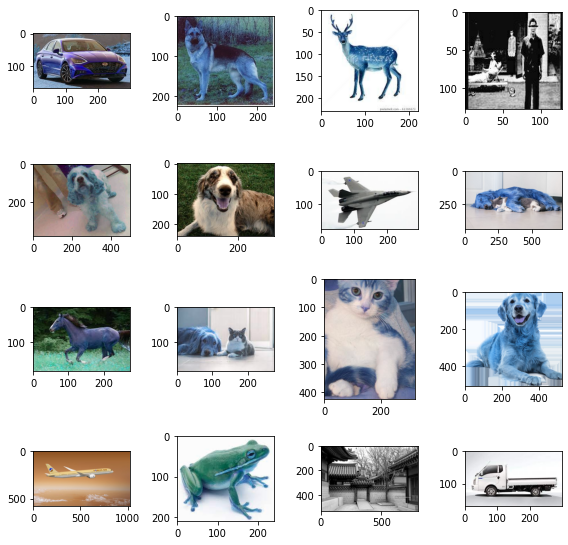

In [ ]:
# matplotlib 이용해서 원본 이미지 출력
# 원본이미지는 RGB 순서 변경하지 않았기 때문에 색이 이상함
# 원본이미지를 보존하기 위해서 변경하지 않음

plt.figure(figsize=(8,8))

for i in range(len(src_img_list)):
    plt.subplot(4,4,i+1)
    plt.imshow(src_img_list[i])

plt.tight_layout()
plt.show()

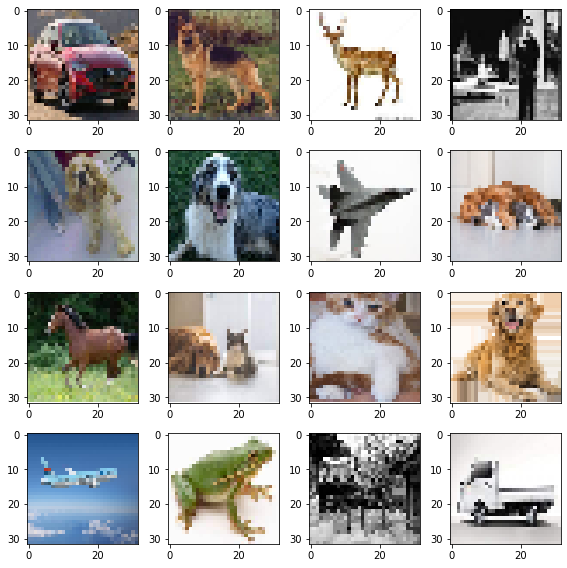

In [ ]:
# matplotlib 이용해서 target 이미지 출력

plt.figure(figsize=(8,8))

for i in range(len(dst_img_list)):
    plt.subplot(4,4,i+1)
    plt.imshow(dst_img_list[i])

plt.tight_layout()
plt.show()

In [ ]:
# predict() 입력을 위해 4차원으로 shape 확장

test_image_array = np.array(dst_img_list)

print(test_image_array.shape)

(16, 32, 32, 3)


In [ ]:
# 이미지 예측을 위한 class name 정의

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

pred = cnn.predict(test_image_array)

print(pred.shape)

(16, 10)


In [ ]:
for index in range(len(pred)):

    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max())

prediction =>  automobile 0.9999968
prediction =>  deer 0.45023224
prediction =>  horse 0.9954006
prediction =>  ship 0.9349645
prediction =>  cat 0.5935437
prediction =>  dog 0.8797925
prediction =>  airplane 0.9981229
prediction =>  cat 0.40825206
prediction =>  horse 0.6729345
prediction =>  cat 0.396464
prediction =>  cat 0.38814557
prediction =>  dog 0.49567932
prediction =>  airplane 0.99951756
prediction =>  frog 0.99983037
prediction =>  deer 0.59823734
prediction =>  truck 0.99870765


In [ ]:
# 상위 3개 예측 값
top3 = 3

for index in range(len(pred)):

    sorted_index = pred[index].argsort()  # 오름차순으로 인덱스 정렬
    sorted_index = sorted_index[::-1]     # 내림차순으로 인덱스 정렬

    print('=====================================')
    print(sorted_index)
    
    for j in range(top3):
        pred_val = pred[index, sorted_index[j]]
        class_index = sorted_index[j]
        print('prediction => ',class_names[class_index], pred_val)
        

[1 9 8 6 0 3 2 5 4 7]
prediction =>  automobile 0.9999968
prediction =>  truck 3.1684049e-06
prediction =>  ship 2.4302673e-11
[4 6 3 2 5 7 0 9 8 1]
prediction =>  deer 0.45023224
prediction =>  frog 0.44574523
prediction =>  cat 0.05724928
[7 4 5 2 3 0 9 6 1 8]
prediction =>  horse 0.9954006
prediction =>  deer 0.004593821
prediction =>  dog 5.530696e-06
[8 0 9 1 7 3 2 4 5 6]
prediction =>  ship 0.9349645
prediction =>  airplane 0.03287946
prediction =>  truck 0.01977714
[3 5 4 2 7 6 9 0 8 1]
prediction =>  cat 0.5935437
prediction =>  dog 0.2826042
prediction =>  deer 0.097024255
[5 2 3 7 4 6 0 9 8 1]
prediction =>  dog 0.8797925
prediction =>  bird 0.05115074
prediction =>  cat 0.048613384
[0 2 4 3 8 7 9 5 6 1]
prediction =>  airplane 0.9981229
prediction =>  bird 0.001755297
prediction =>  deer 7.220163e-05
[3 9 5 1 0 8 6 7 4 2]
prediction =>  cat 0.40825206
prediction =>  truck 0.37134746
prediction =>  dog 0.07685602
[7 4 5 2 3 6 9 0 8 1]
prediction =>  horse 0.6729345
prediction

50% 이상의 확률로 예측한 이미지만 원본으로 정답디렉토리에 저장하고, 50% 미만은 etc 디렉토리에 저장함. 구글 포토 서비스 원시 기능 구현 

In [ ]:
import shutil

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for index in range(len(pred)):

    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max())

    if pred[index].max() >= 0.5:    # 50 % 이상 확률이면

        target_dir = target_root_dir + '/' + class_names[class_index].strip()
        shutil.copy(img_file_list[index], target_dir)
        file_name = img_file_list[index].split('/')[1].strip()
        print('%s is copied into %s' % (file_name, target_dir))

    else:    # 50 % 미만 확률
        target_dir = target_root_dir + '/unknown'
        shutil.copy(img_file_list[index], target_dir)
        file_name = img_file_list[index].split('/')[1].strip()
        print('%s is copied into %s' % (file_name, target_dir))

prediction =>  automobile 0.9999968
car11111.jpg is copied into pred_result/automobile
prediction =>  deer 0.45023224
dog4.jpg is copied into pred_result/unknown
prediction =>  horse 0.9954006
deer11.jpg is copied into pred_result/horse
prediction =>  ship 0.9349645
parasite.jpg is copied into pred_result/ship
prediction =>  cat 0.5935437
dog1.jpg is copied into pred_result/cat
prediction =>  dog 0.8797925
dog2.jpg is copied into pred_result/dog
prediction =>  airplane 0.9981229
fighter.1.jpg is copied into pred_result/airplane
prediction =>  cat 0.40825206
cat2_dog2.jpg is copied into pred_result/unknown
prediction =>  horse 0.6729345
horse12131.jpg is copied into pred_result/horse
prediction =>  cat 0.396464
cat1_dog1.jpg is copied into pred_result/unknown
prediction =>  cat 0.38814557
cat.9.jpg is copied into pred_result/unknown
prediction =>  dog 0.49567932
dog3.png is copied into pred_result/unknown
prediction =>  airplane 0.99951756
airplane.1.jpg is copied into pred_result/airpl